# Understanding Company's Ideal Customers by performing analysis and segmentation using Machine Learning Algorithms!
---

### _Developing an amazing product is one of the hardest challenges that a company can overcome and one of the biggest predictors of success. But strong customer relations is what will truly determine the success of a business._

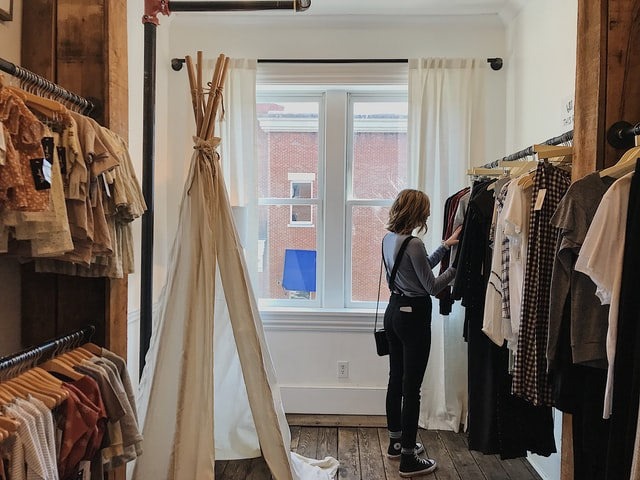

### _At its core, customer relationship management (CRM) is all of the activities, strategies and technologies that companies use to manage their interactions with their current and potential customers. A saying frequently heard and said in many businesses is "customer is king."_

### _Today's consumers have more industry influence than they've ever had in the past, allowing them to focus on more than just the product that you're selling them. Now, consumers are interested in what you're selling them, how you're selling it, and what happens after you've sold it to them._

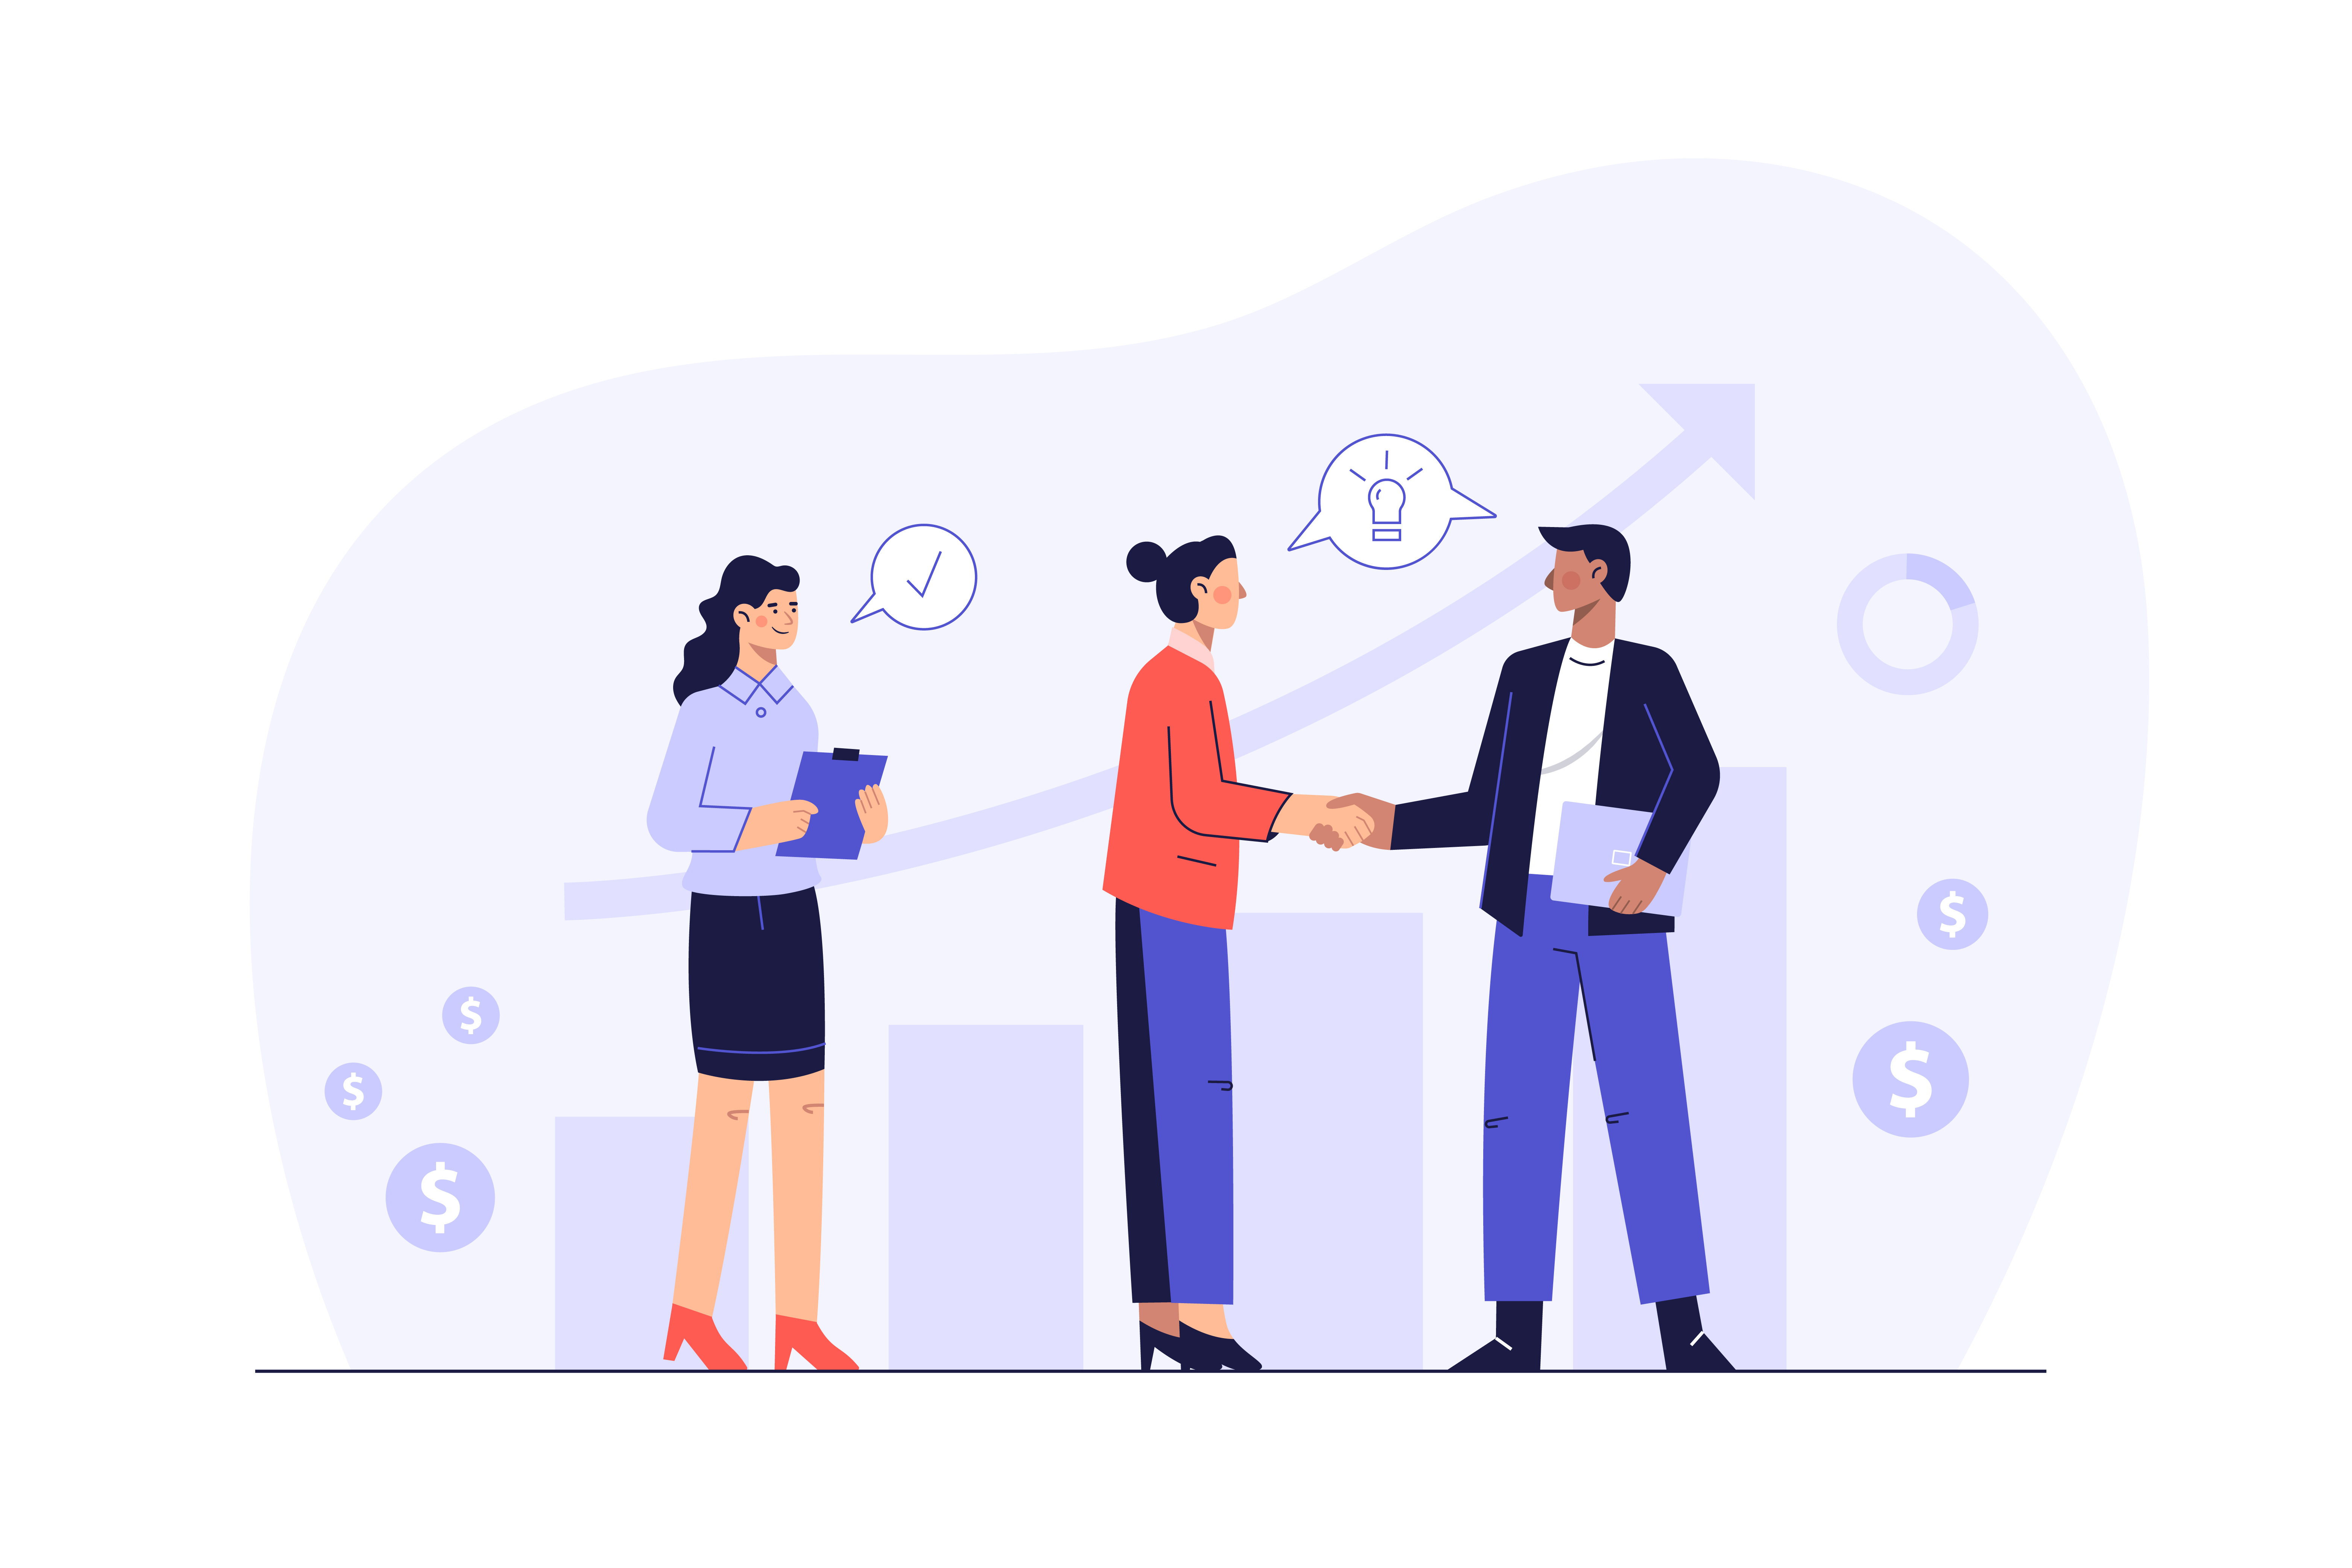

### _To meet the demands for greater customer experiences, companies must focus on managing their customer relationships. Strong customer relations are essential for building customer loyalty and retaining current customers. This means understanding what is required to ensure top-quality customer relationships and create great experiences with your customers._

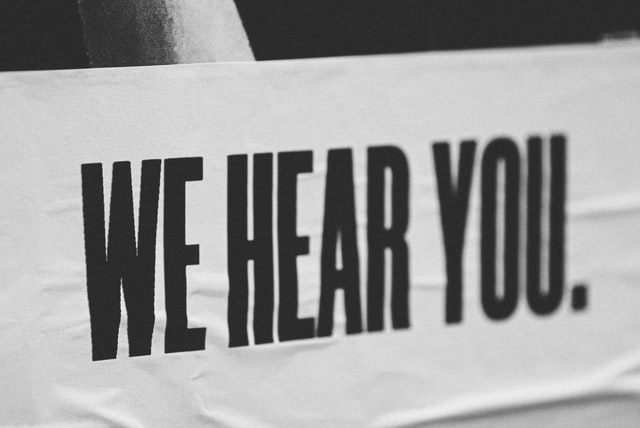

### _Positive customer relations can result in an array of benefits for your company, including more potential leads and higher customer retention rates. To narrow it down, here are several top benefits that positive customer relations can provide for your company._
- Customer Retention
- Customer Loyalty
- Customer Satisfaction
- Customer Feedback

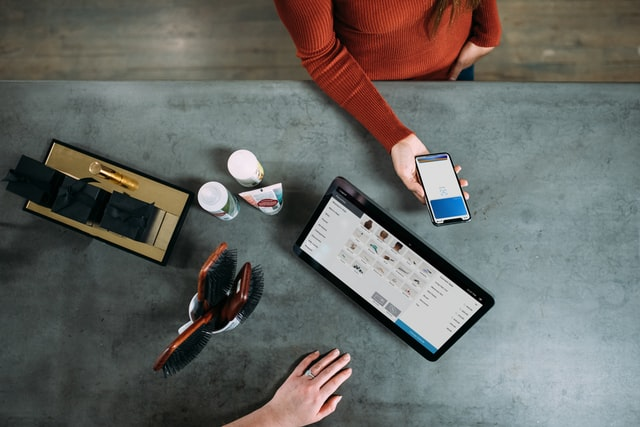



---
---
# _Importing Libraries_


In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# _Reading the Datasets_

In [4]:
df = pd.read_csv('customer seg data.csv', sep="\t")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# _Checking for Null values_

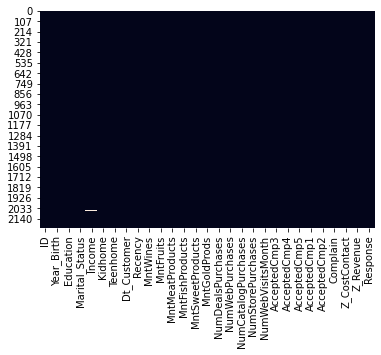

In [6]:
sns.heatmap(df.isnull(), cbar=False)

In [7]:
df = df.fillna(df['Income'].mean())

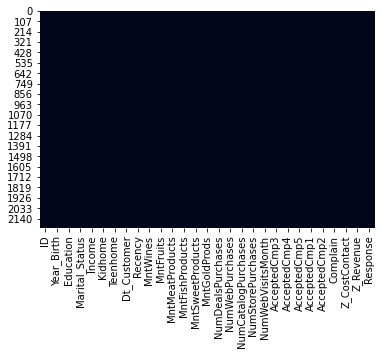

In [8]:
sns.heatmap(df.isnull(), cbar=False)

##### Now, as it seems.. null values has been taken care of !

---

# _Exploratory data analysis and visualization:_

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].apply(['min', 'max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [10]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [11]:
df.shape

(2240, 27)

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# _Using Correlation to plot a Heatmap_

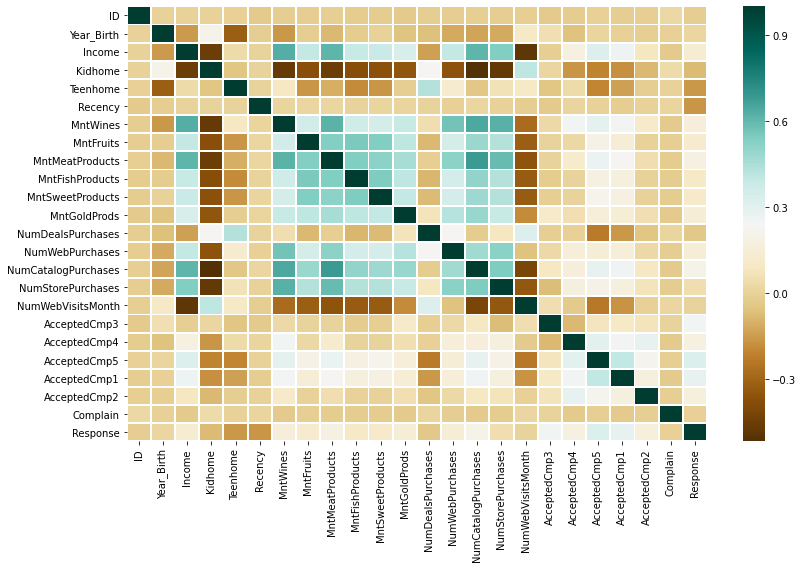

In [24]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=False, cmap="BrBG", linewidths=.9)

# _Visualizing-_

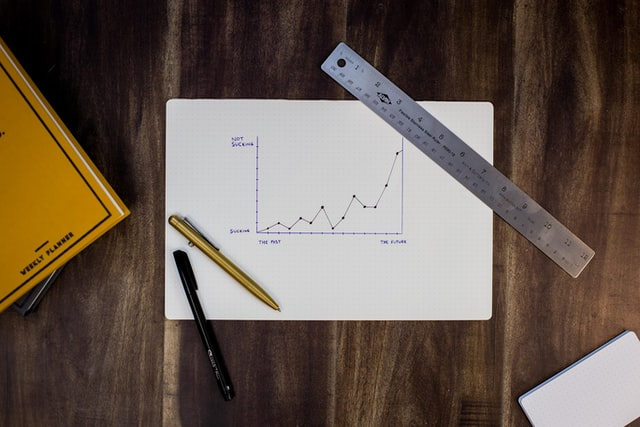

In [13]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
df['Age'] = df.apply(lambda df:  2015- df['Year_Birth'], axis=1)

In [23]:
df['Children'] = df.apply(lambda df: df['Kidhome'] + df['Teenhome'], axis=1)

In [26]:
df['Have_Children'] = np.where(df.Children > 0, 1, 0)

In [30]:
df['Spent'] = df.apply(lambda df: df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + 
                df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'], axis=1)

In [42]:
df = df.drop(df.loc[df['Income'] > 600000].index)
df = df.drop(df.loc[df['Age'] > 100].index)

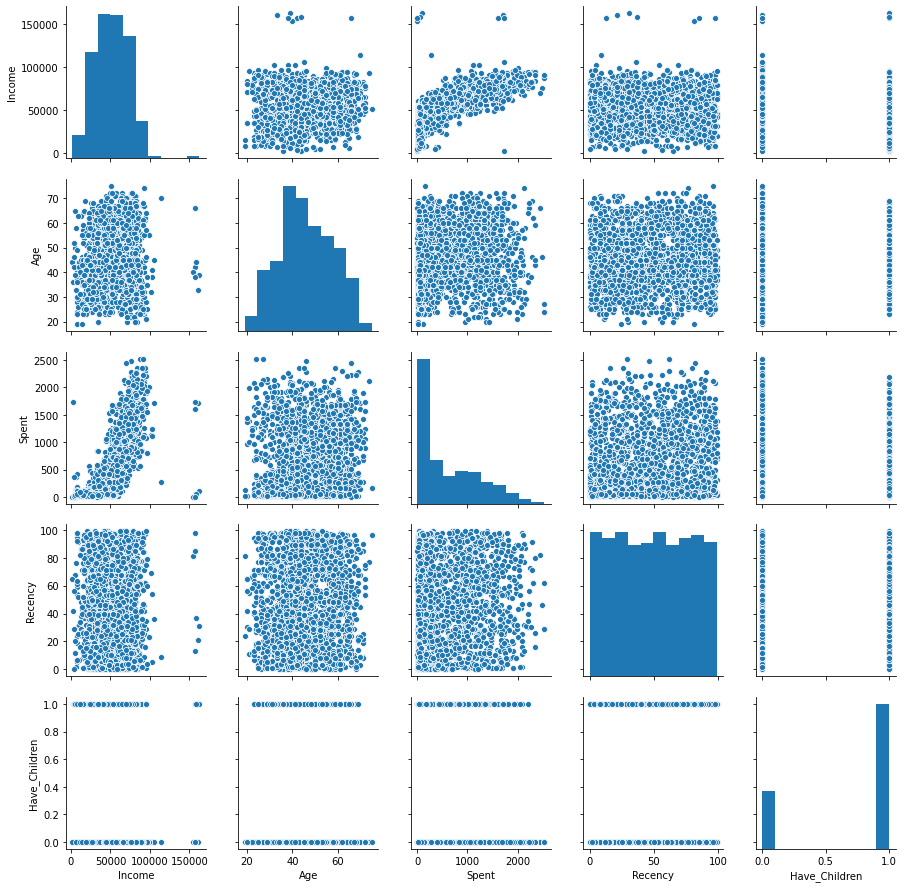

In [44]:
pairplot = df.loc[:, ['Income', 'Age', 'Spent', 'Recency', 'Have_Children']]

sns.pairplot(pairplot, palette='rocket')

In [46]:
bins = [0, 20, 40, 60, 80,100]
aged = pd.cut(df['Age'], bins=bins)

Text(0.5, 1.0, 'Visualizing different ages')

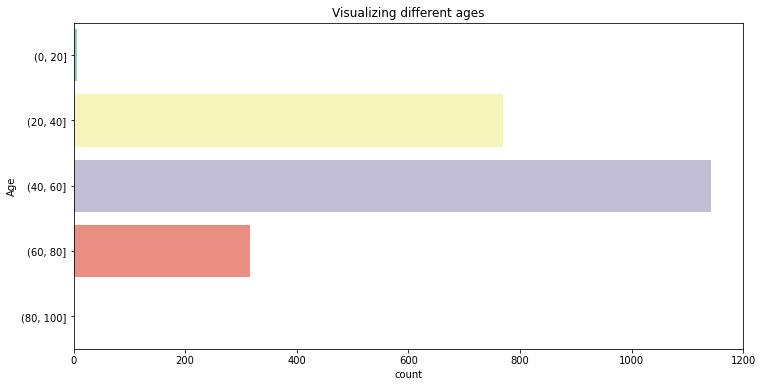

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y=aged, palette='Set3')
plt.title('Visualizing different ages')

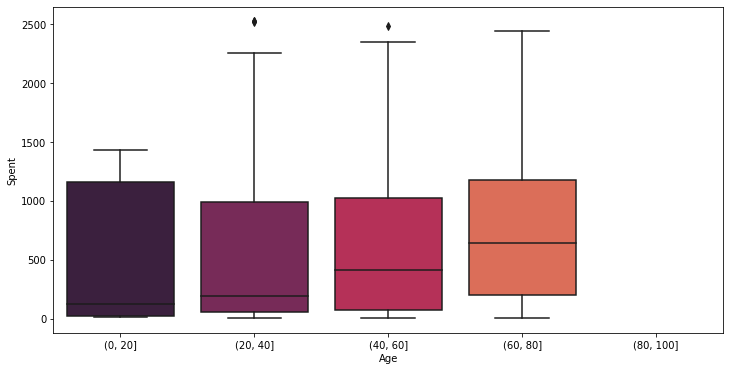

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x=aged, y=df['Spent'], palette='rocket')

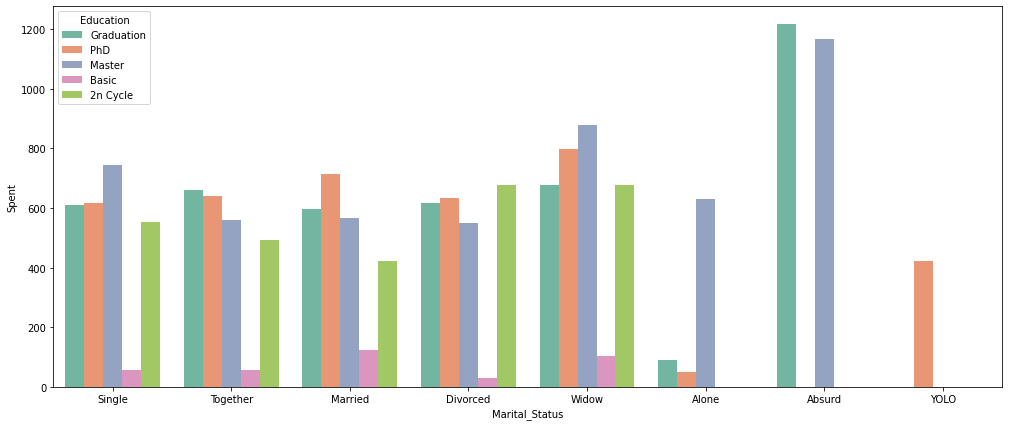

In [58]:
plt.figure(figsize=(17,7))
sns.barplot(x= 'Marital_Status',y='Spent',hue='Education',data=df, ci=0, palette='Set2')

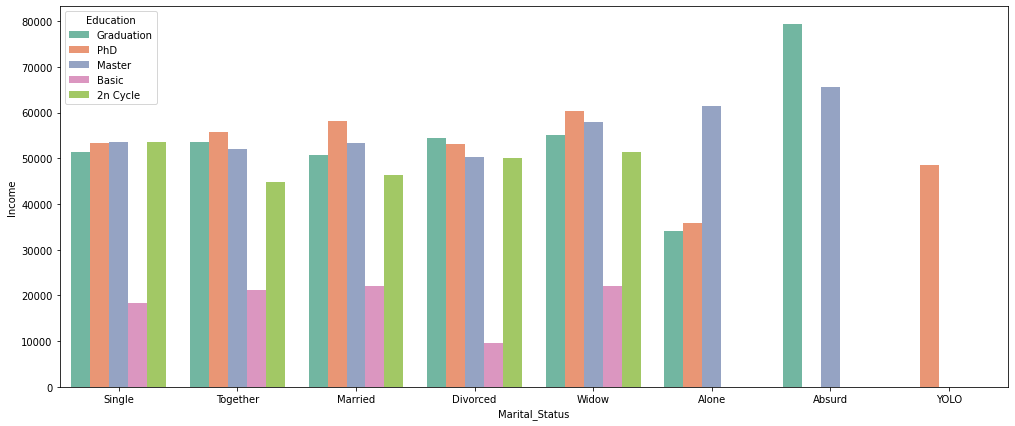

In [67]:
plt.figure(figsize=(17,7))
sns.barplot(x= 'Marital_Status',y='Income',hue='Education',data=df, ci=0,palette='Set2')

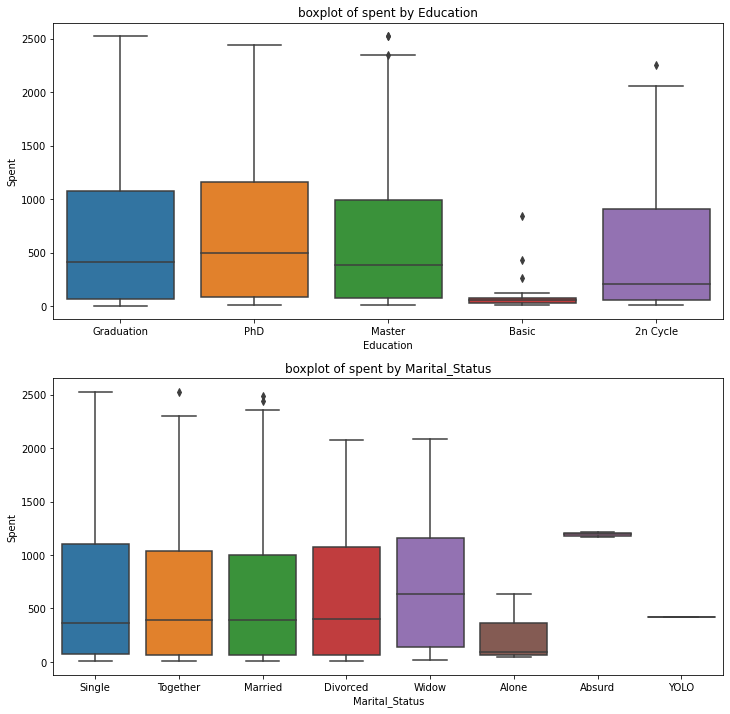

In [69]:
to_boxplot = ['Education', 'Marital_Status']
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.flatten()

for col, ax in zip(to_boxplot, axes):
    ax = sns.boxplot(data=df, x=col, y='Spent', ax=ax, palette='tab10')
    ax.set_title(f'boxplot of spent by {col}')


Text(0.5, 1.0, 'Income and spending')

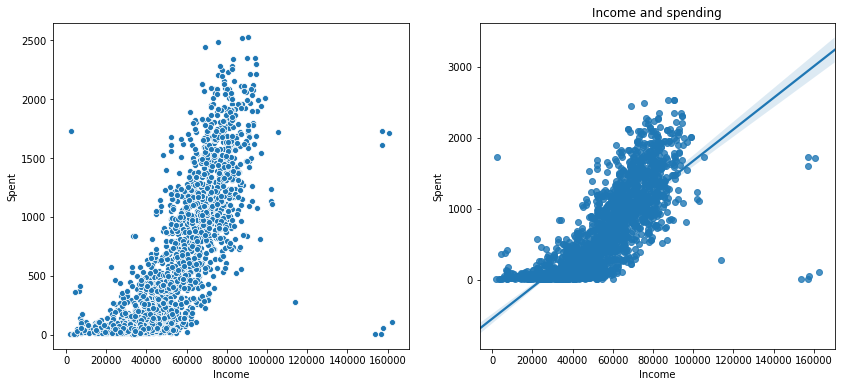

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(y=df['Spent'], x=df['Income'], ax=axes[0])
sns.regplot(y='Spent', x='Income', data=df, ax=axes[1])
plt.title('Income and spending')

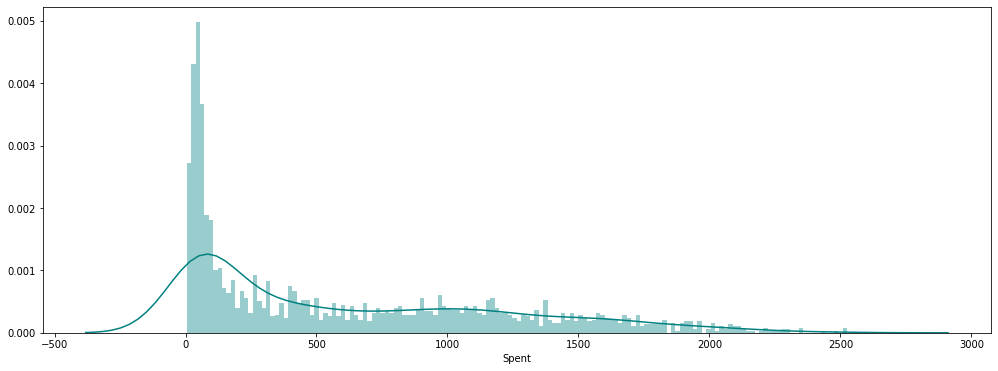

In [88]:
plt.figure(figsize=(17,6))
sns.distplot(df['Spent'], bins=150, kde=True,color='teal' )

In [77]:
df['TotalAcceptedCmp'] = df.apply(lambda df: df['AcceptedCmp1'] + df['AcceptedCmp2'] + 
                                      df['AcceptedCmp3'] + df['AcceptedCmp4'] + 
                                      df['AcceptedCmp5'], axis=1)

In [78]:
df['NumTotalPurchases'] = df.apply(lambda df: df['NumWebPurchases'] + df['NumCatalogPurchases'] + 
                            df['NumStorePurchases'] + df['NumDealsPurchases'], axis=1)

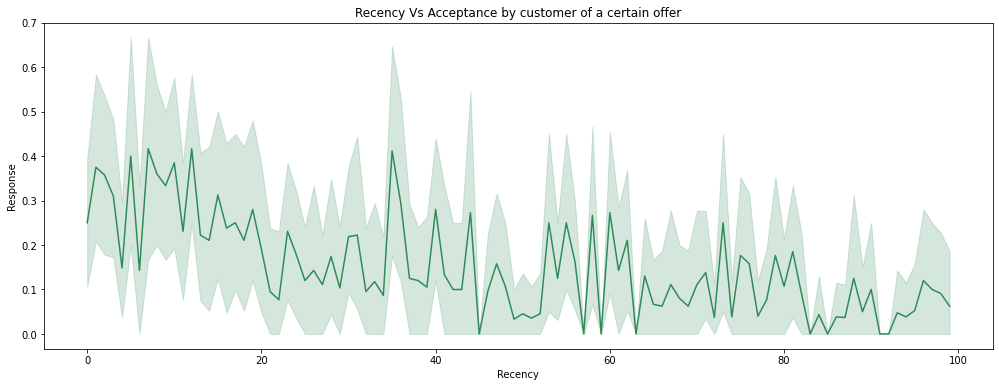

In [93]:
plt.figure(figsize=(17,6))
plt.title('Recency Vs Acceptance by customer of a certain offer')
sns.lineplot(x='Recency', y='Response', data=df, color ='seagreen')

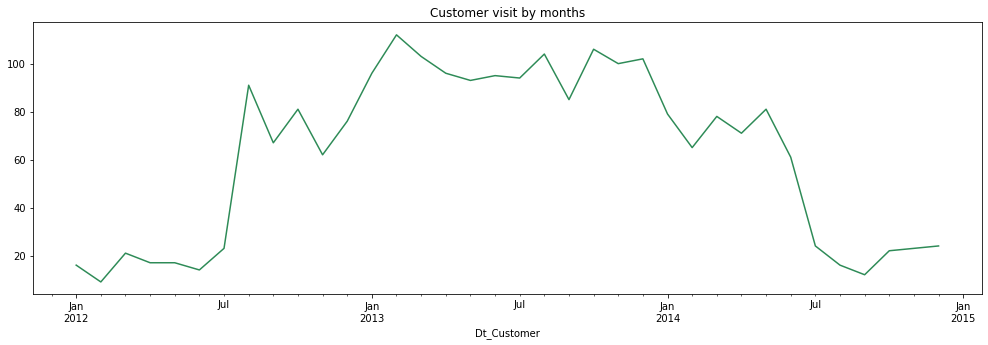

In [97]:
groupedDate = df.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(17,5))
plt.title('Customer visit by months')
groupedDate.NumWebVisitsMonth.plot(kind='line', color='seagreen')

---
---
# _Feature selection_

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

In [99]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [100]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [101]:
ds = df.copy()
cols_del = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
            'Complain', 'Response', 'Have_Children', 'Dt_Customer',  'Children']
ds = ds.drop(cols_del, axis=1)

In [102]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

---
---

# _Dimentionality Reduction using PCA_

### _Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting._
### _Principal Component Analysis (PCA) algorithm used to compress a dataset onto a lower-dimensional feature subspace with the goal of maintaining most of the relevant information._
---

In [103]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,3.078436e-17,2.827576,-4.829811,-2.688984,-0.544257,2.465923,7.629489
col2,2236.0,7.805325e-17,1.609570,-4.211739,-1.260274,-0.001701,1.242822,4.561792
col3,2236.0,5.223411e-17,1.327122,-4.856815,-0.881084,-0.014493,0.763987,5.873930


In [104]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

## _Visualizing with the help of cluster!_

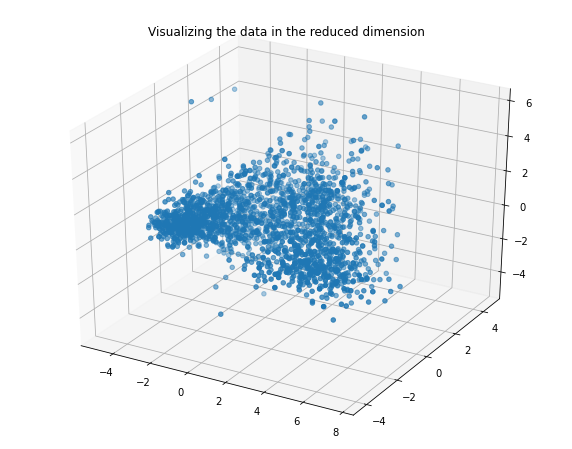

In [115]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" , cmap ='tab20')
ax.set_title("Visualizing the data in the reduced dimension")
plt.show()

# _Making more Clusters_

In [111]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# _Agglomerative clustering_

In [112]:
AC = AgglomerativeClustering(n_clusters=4)

## _Fitting the model-_

In [113]:
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [114]:
df["Clusters"]= yhat_AC

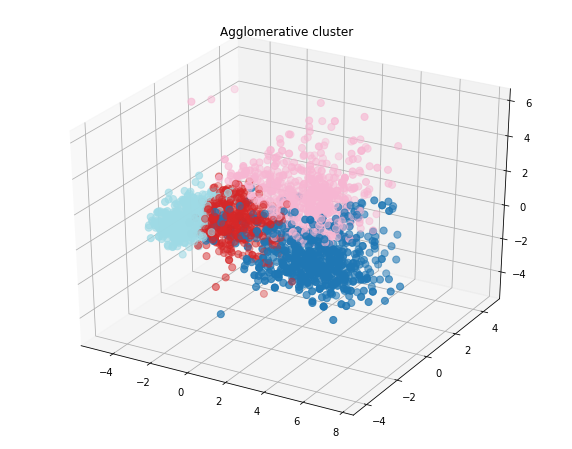

In [116]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=50, c=PCA_ds["Clusters"], marker='o', cmap = 'tab20' )
ax.set_title("Agglomerative cluster")
plt.show()

# _Analyzing the above clusters -_

### _Defining the grouping of the clusters above and below-_

- 0: High spending and average income
- 1: High consumption and high income
- 2: Low spending and low income
- 3: High spending and low income

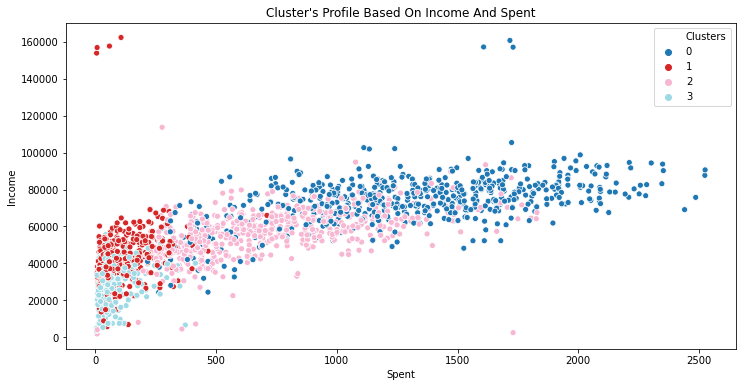

In [118]:
plt.figure(figsize=(12, 6))
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= 'tab20')
pl.set_title("Cluster's Profile Based On Income And Spent")
plt.legend()
plt.show()

## _And Hence, <br> the customer characters are segmented!_